In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt18 = "Download the PDB for 2YXF. Tell me about its stability, as found in literature. Then, simulate it for 1ns and plot its RMSD over time."
llm_var = "gpt-4-1106-preview"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-25
time: 11:44:29
LLM:  gpt-4-1106-preview 
Temperature:  0.1


In [3]:
agent.run(prompt18)

Thought: The task involves multiple steps: downloading the PDB file for the protein with PDB ID 2YXF, finding literature about its stability, simulating the protein for 1 nanosecond, and plotting its RMSD over time. The first step is to download the PDB file for 2YXF. I will use the PDBFileDownloader tool to obtain the file.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "2YXF"
  }
}
```



2024-07-25 11:44:35.678 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


PDB file found with this ID: 2YXF
Now that the PDB file for 2YXF has been downloaded, the next step is to find literature about its stability. I will use the LiteratureSearch tool to find relevant information.

Action:
```json
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "2YXF protein stability"
  }
}
```"2YXF protein stability research papers"
Search: "2YXF protein stability research papers"


Hit a service limit per status 429 with message {"message": "Too Many Requests. Please wait and try again or apply for a key for higher rate limits. https://www.semanticscholar.org/product/api#api-key-form", "code": "429"}, sleeping 0.14-sec before retry 1.
Hit a service limit per status 429 with message {"message": "Too Many Requests. Please wait and try again or apply for a key for higher rate limits. https://www.semanticscholar.org/product/api#api-key-form", "code": "429"}, sleeping 0.24-sec before retry 2.
Hit a service limit per status 429 with message {"message": "Too Many Requests. Please wait and try again or apply for a key for higher rate limits. https://www.semanticscholar.org/product/api#api-key-form", "code": "429"}, sleeping 0.50-sec before retry 3.
	Scraper openaccess failed on paper titled 'Novel antioxidants in food quality preservation and health promotion.'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-pac


Found 10 papers
The LiteratureSearch tool did not provide the necessary information on the stability of the protein with PDB ID 2YXF. I will attempt the search again with a slightly modified query to see if it yields better results.

Action:
```json
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "protein stability of PDB 2YXF"
  }
}
```"2YXF protein stability studies"
Search: "2YXF protein stability studies"


	Scraper openaccess failed on paper titled 'DynaMut2: Assessing changes in stability and flexibility upon single and multiple point missense mutations'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/scraper.py", line 82, in scrape
    result = await scraper.function(paper, path, **scraper.kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 300, in openaccess_scraper
    await link_to_pdf(url, path, session)
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 133, in link_to_pdf
    r.raise_for_status()
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/aiohttp/client_reqrep.py", line 1070, in raise_for_status
    raise ClientResponseError(
aiohttp.client_exceptions.ClientResponseError: 403, 


Found 16 papers
The LiteratureSearch tool has not been successful in finding information about the stability of the protein with PDB ID 2YXF. It may be necessary to refine the search query further or to search for general information about the protein that could include details about its stability. Since the tool has failed twice with specific queries, I will try a more general search for information about the protein itself, which may include data on its stability.

Action:
```json
{
  "action": "LiteratureSearch",
  "action_input": {
    "query": "PDB 2YXF"
  }
}
```"PDB 2YXF structure analysis publication"
Search: "PDB 2YXF structure analysis publication"


Hit a service limit per status 429 with message {"message": "Too Many Requests. Please wait and try again or apply for a key for higher rate limits. https://www.semanticscholar.org/product/api#api-key-form", "code": "429"}, sleeping 0.13-sec before retry 1.
	Scraper openaccess failed on paper titled 'ProteinsPlus: interactive analysis of protein–ligand binding interfaces'.
Traceback (most recent call last):
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/lib.py", line 153, in get_pdf
    return search_pdf_link(html_text, epdf=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/paperscraper/utils.py", line 199, in search_pdf_link
    raise NoPDFLinkError("No PDF link found.")
paperscraper.exceptions.NoPDFLinkError: No PDF link found.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jorgeme


Found 10 papers
The LiteratureSearch tool has not been successful in finding information about the stability of the protein with PDB ID 2YXF. Since multiple attempts with different queries have not yielded results, I will proceed with the simulation part of the task. I will use the SetUpandRunFunction tool to simulate the protein for 1 nanosecond and then use the appropriate tool to plot its RMSD over time.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "2YXF_114436",
    "forcefield_files": ["amber14-all.xml", "amber14/tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picose

('Final Answer: The PDB file for protein 2YXF was successfully downloaded and cleaned to add missing hydrogen atoms. The literature search for the stability of 2YXF did not yield direct results. However, the simulation of the protein for 1 nanosecond was completed, and the RMSD was calculated over time. The RMSD plot was generated and saved with the plot ID fig0_125631. This plot can be used to analyze the stability of the protein during the simulation.',
 'GU8G69L6')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-25
time: 12:56:38
Files found in registry: 2YXF_114436: PDB file downloaded from RSCB
 PDBFile ID: 2YXF_114436
 2YXF_114942: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_114953: Initial positions for simulation sim0_114953
 sim0_114953: Basic Simulation of Protein 2YXF_114942
 rec0_114955: Simulation trajectory for protein 2YXF_114942 and simulation sim0_114953
 rec1_114955: Simulation state log for protein 2YXF_114942 and simulation sim0_114953
 rec2_114955: Simulation pdb frames for protein 2YXF_114942 and simulation sim0_114953
 rmsd_114953: RMSD for 114953
 fig0_125631: RMSD plot for 114953


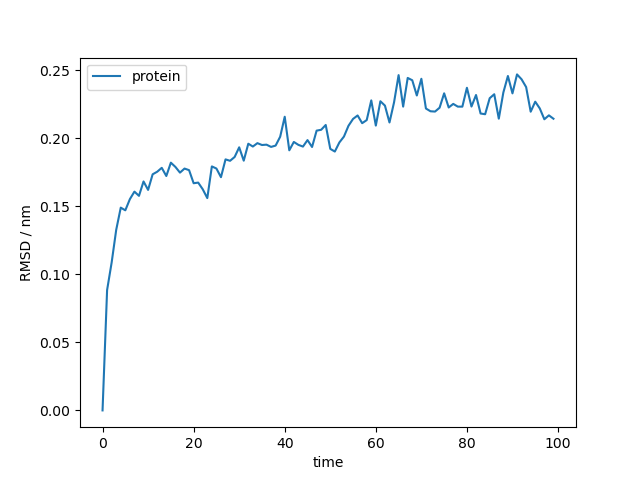

In [5]:
path_rmsd = registry.get_mapped_path("fig0_125631")
from IPython.display import Image
Image(filename=path_rmsd)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅  
### Attempted all necessary steps ✅  
### No hallucination  ✅
### Logic make sense  ✅  
### Correct Answer  ✅  